# **HEART DISEASE PREDICTION USING MACHINE LEARNING**



---



# Abstract
___________
Cardiovascular(Heart) Diseases are the leading cause of death globally. Day by day these cases are increasing at a rapid rate. Prevention is better than cure. Predicting and preventing heart disease can save many lives. This project mainly focuses on predicting whether a person will be affected by heart disease in the future using Machine Learning algorithms based on some medical attributes. Several Machine Learning algorithms have been trained and tested. Among all the algorithms K-Nearest Neighbors showed a good accuracy of about 95.08% and recall of about 96.97%, which is outperforming the previously used models.


#### Importing the required libraries

In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
#drive.mount("/content/gdrive/", force_remount=True)
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
root_path = 'gdrive/My Drive/New_Project'
print(os.getcwd())
print("List of files :-")
!ls

/content/gdrive/My Drive/New_Project
List of files :-
burden-of-disease-by-cause.csv	heart.csv


#### burden-of-disease-by-cause.csv  contains the data of diseases across the world
#####           The sum of mortality and morbidity is referred to as the ‘burden of disease’ and can be measured by a metric called "Disability Adjusted Life Years" (DALYs). DALYs are measuring lost health and are a standardized metric that allow for direct comparisons of disease burdens of different diseases across countries, between different populations, and over time. Conceptually, one DALY is the equivalent of losing one year in good health because of either premature death or disease or disability. One DALY represents one lost year of healthy life.
### Here, heart diseases are referred to as Cardiovascular diseases

In [ ]:
df=pd.read_csv("burden-of-disease-by-cause.csv")
df.columns
l=list(df.columns[:3])
for i in df.columns[3:]:
    a=re.findall("- ([^-]*) ",i)[0]
    l.append(a)
l[12]="Self-harm"
l[21]="Other non-communicable diseases"
df.columns=l
df=df[df["Entity"]=="India"]
df.drop(["Code"],axis=1,inplace=True)
l=[]
for i in df.columns[2:]:
    l.append(np.mean(df[i]))
disease_names=list(df.columns)[2:]
df.head(3)
disease_sorted=list(zip(l,disease_names))
disease_sorted.sort(reverse=False)
x=[i[0] for i in disease_sorted]
y=[i[1] for i in disease_sorted]

### Visualizing average burden of diseases in India from 1990 to 2019

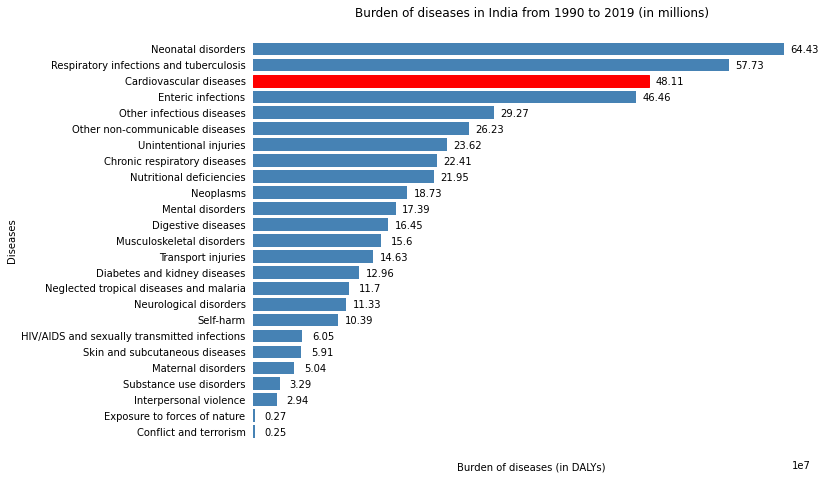

In [ ]:
plt.figure(figsize=(10,8))
bars=plt.barh(range(len(x)),x,color="steelblue")
plt.tick_params(top=False,bottom=False,left=False,right=False,labelbottom=False)
plt.yticks(range(len(y)),y)
bars[-3].set_color("red")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title("Burden of diseases in India from 1990 to 2019 (in millions)")
plt.xlabel("Burden of diseases (in DALYs)")
plt.ylabel("Diseases")
for bar in bars:
    plt.text(bar.get_width()+2500000,
             bar.get_y()+0.15,
             str(np.round(bar.get_width()/1000000,2)),
            ha="center",
            fontsize=10,
            color="black")

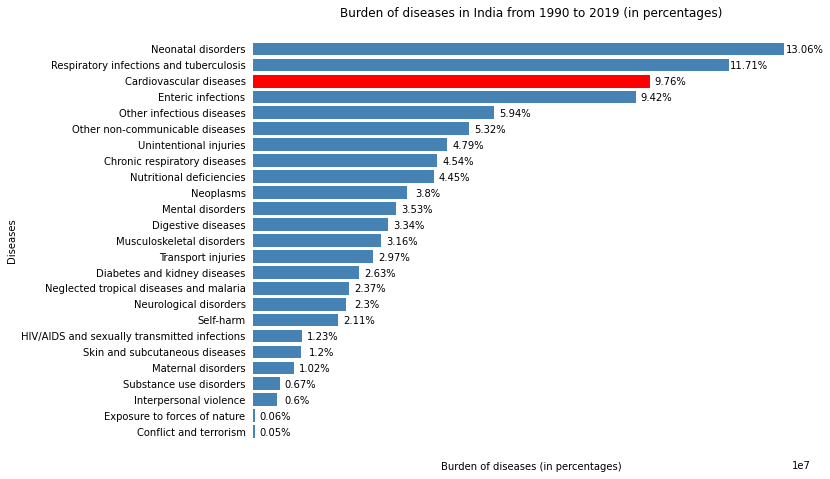

In [ ]:
plt.figure(figsize=(10,8))
bars=plt.barh(range(len(x)),x,color="steelblue")
plt.tick_params(top=False,bottom=False,left=False,right=False,labelbottom=False)
plt.yticks(range(len(y)),y)
bars[-3].set_color("red")
plt.xlabel("Burden of diseases (in percentages)")
plt.ylabel("Diseases")
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.title("Burden of diseases in India from 1990 to 2019 (in percentages)")
for bar in bars:
    plt.text(bar.get_width()+2500000,
             bar.get_y()+0.15,
             str(np.round(bar.get_width()*100/sum(l),2))+"%",
            ha="center",
            fontsize=10,
            color="black")

### Visualizing burden of heart disease in India from 1990 to 2019

Text(0.5, 0, 'Years')

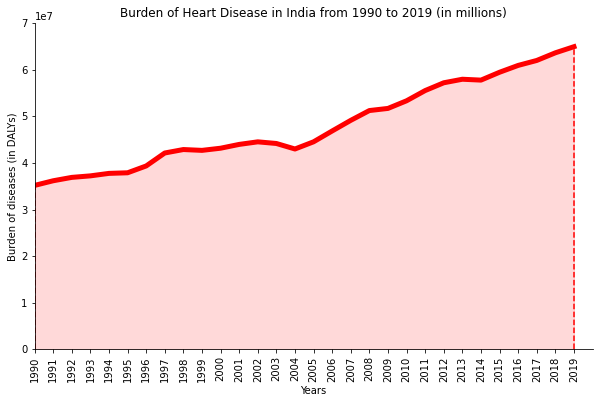

In [ ]:
plt.figure(figsize=(10,6))
x_values=range(len(df["Cardiovascular diseases"]))
a=plt.plot(x_values,df["Cardiovascular diseases"],c="red",lw=5)
plt.xticks(x_values,df["Year"])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
temp=0
for i in plt.gca().spines.values():
    if(temp%2!=0):
        i.set_visible(False)
    temp+=1
plt.vlines(x=29,ymin=0,ymax=list(df["Cardiovascular diseases"])[-1],colors="red",linestyles="dashed")
plt.vlines(x=0,ymin=0,ymax=list(df["Cardiovascular diseases"])[0],colors="red",linestyles="dashed")
plt.fill_between(x_values,df["Cardiovascular diseases"],alpha=0.15,color="red")
plt.ylim(0,70000000)
plt.xlim(0,30)
plt.title("Burden of Heart Disease in India from 1990 to 2019 (in millions)")
plt.ylabel("Burden of diseases (in DALYs)")
plt.xlabel("Years")

### This visualization shows how the burden of heart diseases incresed than other diseases

Text(0.5, 0, 'Years')

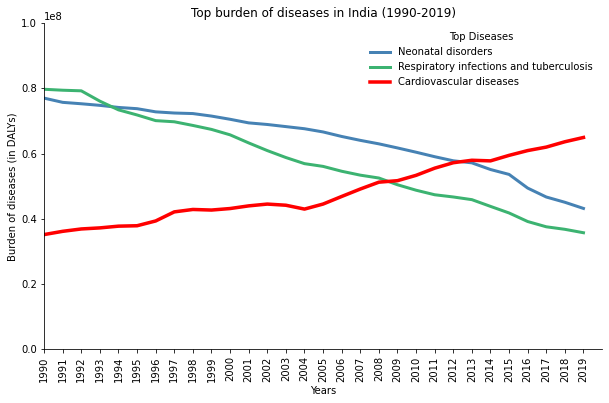

In [ ]:
plt.figure(figsize=(10,6))
x_values=range(len(df["Cardiovascular diseases"]))
plt.plot(x_values,df["Neonatal disorders"],c="steelblue",lw=3,label="Neonatal disorders")
plt.plot(x_values,df["Respiratory infections and tuberculosis"],c="mediumseagreen",lw=3,label="Respiratory infections and tuberculosis")
a=plt.plot(x_values,df["Cardiovascular diseases"],c="red",lw=3.5,label="Cardiovascular diseases")
plt.xticks(x_values,df["Year"])
for i in plt.gca().get_xticklabels():
    i.set_rotation(90)
temp=0
for i in plt.gca().spines.values():
    if(temp%2!=0):
        i.set_visible(False)
    temp+=1
plt.ylim(0,100000000)
plt.xlim(0,30)
plt.title("Top burden of diseases in India (1990-2019)")
plt.legend(frameon=False,title="Top Diseases")
plt.ylabel("Burden of diseases (in DALYs)")
plt.xlabel("Years")

#### From these observations, heart diseases are increasing at a rapid rate in India and world. It’s very Important concerning to predict any such diseases beforehand. This diagnosis is a difficult task i.e. it should be performed precisely and efficiently. The data set (heart.csv) is taken from kaggle.

### Exploratory Data Analysis

In [ ]:
heart_df=pd.read_csv("heart.csv")

In [ ]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# Shape of DataFrame
heart_df.shape

(1025, 14)

In [ ]:
# Columns
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#Checking the null values
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Dropping the duplicate entries
heart_df=heart_df.drop_duplicates()
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [ ]:
# Usinng describe() method to know the statistical description of DataFrame
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Using info() method to know the information of the DataFrame
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [ ]:
#Counting no.of values of diseases(1) and no diseases(0)
target_values=heart_df["target"].value_counts()
target_values
# 0 = No Heart Disease
# 1 = Heart Disease

1    164
0    138
Name: target, dtype: int64

#### Analyzing gender with disease using pie chart visualizations
##### Women are more prone to heart disease than men.

Text(0.5, 1.0, 'No Heart Disease')

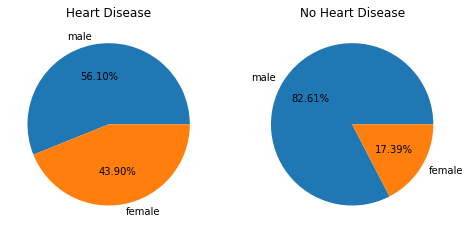

In [ ]:
# Gender comparision
#male=1,female=0
plt.figure(figsize=(8,8))
plt.subplot(121)
male_heart_disease=len(heart_df[(heart_df["sex"]==1)&(heart_df["target"]==1)])
female_heart_disease=len(heart_df[(heart_df["sex"]==0)&(heart_df["target"]==1)])
plt.pie([male_heart_disease,female_heart_disease],labels=["male","female"],autopct='%1.2f%%');
plt.title("Heart Disease")

plt.subplot(122)
male_heart_nodisease=len(heart_df[(heart_df["sex"]==1)&(heart_df["target"]==0)])
female_heart_nodisease=len(heart_df[(heart_df["sex"]==0)&(heart_df["target"]==0)])
plt.pie([male_heart_nodisease,female_heart_nodisease],labels=["male","female"],autopct='%1.2f%%');
plt.title("No Heart Disease")

#### Analyzing chest pain with disease using pie chart visualizations
##### Non-anginal pain is more frequent for the people who are being affected by heart disease and typical angina is common for no heart diseased people.

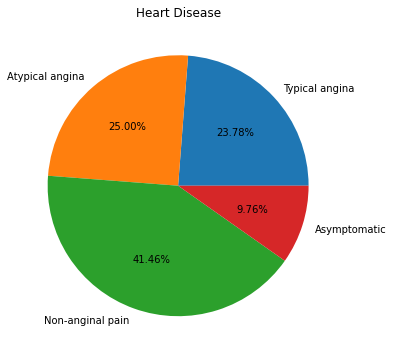

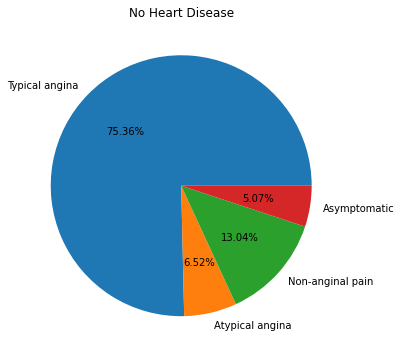

In [ ]:
#cp: chest pain type
#-- Value 0: typical angina
#-- Value 1: atypical angina
#-- Value 2: non-anginal pain
#-- Value 3: asymptomatic
plt.figure(figsize=(6,6))

pain_type_1_disease=len(heart_df[(heart_df["cp"]==0) & (heart_df["target"]==1)])
pain_type_2_disease=len(heart_df[(heart_df["cp"]==1) & (heart_df["target"]==1)])
pain_type_3_disease=len(heart_df[(heart_df["cp"]==2) & (heart_df["target"]==1)])
pain_type_4_disease=len(heart_df[(heart_df["cp"]==3) & (heart_df["target"]==1)])
plt.title("Heart Disease")
plt.pie([pain_type_1_disease,pain_type_2_disease,pain_type_3_disease,pain_type_4_disease],
        labels=["Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"],autopct='%1.2f%%');

plt.figure(figsize=(6,6))
pain_type_1_nodisease=len(heart_df[(heart_df["cp"]==0) & (heart_df["target"]==0)])
pain_type_2_nodisease=len(heart_df[(heart_df["cp"]==1) & (heart_df["target"]==0)])
pain_type_3_nodisease=len(heart_df[(heart_df["cp"]==2) & (heart_df["target"]==0)])
pain_type_4_nodisease=len(heart_df[(heart_df["cp"]==3) & (heart_df["target"]==0)])
plt.title("No Heart Disease")
plt.pie([pain_type_1_nodisease,pain_type_2_nodisease,pain_type_3_nodisease,pain_type_4_nodisease],
        labels=["Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"],autopct='%1.2f%%');

#### Analyzing age with disease using histogram visualizations
##### Middle-aged people are more prone to heart diseases than young and old people.

Text(0.5, 1.0, 'Age and Heart disease')

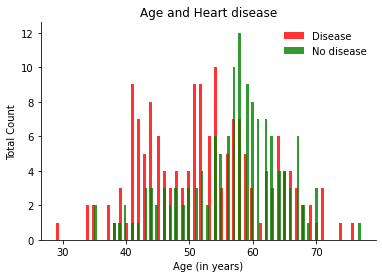

In [ ]:
# Age
disease_age=heart_df[heart_df["target"]==1]["age"]
nodisease_age=heart_df[heart_df["target"]==0]["age"]
plt.figure()
plt.hist(disease_age,color="red",alpha=0.8,label="Disease",bins=100)
plt.hist(nodisease_age,color="green",alpha=0.8,label="No disease",bins=100)
plt.legend(frameon=False)
plt.xlabel("Age (in years)")
plt.ylabel("Total Count")
i=0
for spine in plt.gca().spines.values():
    if(i%2!=0):
        spine.set_visible(False)
    i+=1
plt.tick_params(right=False,top=False)
plt.title("Age and Heart disease")

#### Analyzing resting blood pressure with disease using histogram visualizations

Text(0.5, 1.0, 'Resting blood pressure and Heart disease')

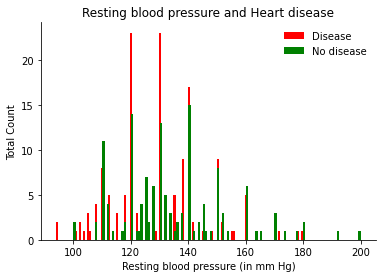

In [ ]:
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)
bps_disease=heart_df[heart_df["target"]==1]["trestbps"]
bps_nodisease=heart_df[heart_df["target"]==0]["trestbps"]
plt.hist(bps_disease,facecolor="red",bins=120,label="Disease");
plt.hist(bps_nodisease,facecolor="green",bins=120,label="No disease");
plt.legend(frameon=False)
i=0
for spine in plt.gca().spines.values():
    if(i%2!=0):
        spine.set_visible(False)
    i+=1
plt.tick_params(right=False,top=False)
plt.xlabel("Resting blood pressure (in mm Hg)")
plt.ylabel("Total Count")
plt.title("Resting blood pressure and Heart disease")

#### Analyzing serum cholestoral with disease using histogram visualizations

Text(0.5, 1.0, 'Serum cholestoral and Heart disease')

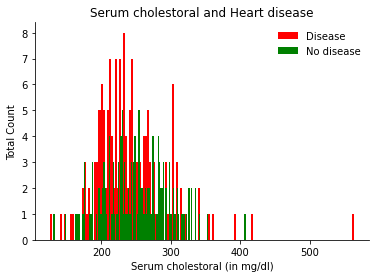

In [ ]:
# chol: serum cholestoral in mg/dl
chol_disease=heart_df[heart_df["target"]==1]["chol"]
chol_nodisease=heart_df[heart_df["target"]==0]["chol"]
plt.hist(chol_disease,facecolor="red",bins=150,label="Disease");
plt.hist(chol_nodisease,facecolor="green",bins=150,label="No disease");
plt.legend(frameon=False)
plt.xlabel("Serum cholestoral (in mg/dl)")
plt.ylabel("Total Count")
i=0
for spine in plt.gca().spines.values():
    if(i%2!=0):
        spine.set_visible(False)
    i+=1
plt.tick_params(right=False,top=False)
plt.title("Serum cholestoral and Heart disease")

#### Analyzing maximum heart rate achieved with disease using histogram visualizations
##### Maximum heart rate acheived is more for the diseased people than non-diseased people.

Text(0.5, 1.0, 'Maximum heart rate and Heart disease')

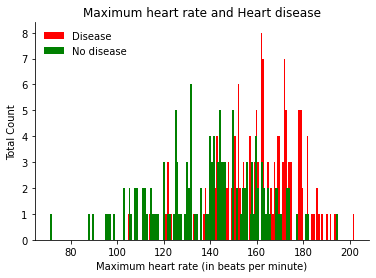

In [ ]:
#  thalach: maximum heart rate achieved
thalach_disease=heart_df[heart_df["target"]==1]["thalach"]
thalach_nodisease=heart_df[heart_df["target"]==0]["thalach"]
plt.hist(thalach_disease,facecolor="red",bins=150,label="Disease");
plt.hist(thalach_nodisease,facecolor="green",bins=150,label="No disease");
plt.legend(frameon=False)
plt.xlabel("Maximum heart rate (in beats per minute)")
plt.ylabel("Total Count")
i=0
for spine in plt.gca().spines.values():
    if(i%2!=0):
        spine.set_visible(False)
    i+=1
plt.tick_params(right=False,top=False)
plt.title("Maximum heart rate and Heart disease")

In [ ]:
# Converting categorical data into dummy or indicator variables
heart_df=pd.get_dummies(heart_df,columns=["sex","cp","fbs","restecg","exang","slope","ca","thal"])

In [ ]:
X=heart_df.drop(["target"],axis=1) # Feature variable
y=heart_df[["target"]]   # Target variable
X.shape,y.shape

((302, 30), (302, 1))

In [ ]:
# Splitting dataset into train and test datasets
numeric=[i for i in "age trestbps chol thalach oldpeak".split()]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y["target"],random_state=58)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((241, 30), (61, 30), (241, 1), (61, 1))

### Using Robust scaler preprocessing technique for scaling the data.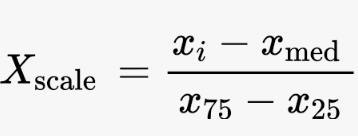

In [ ]:
robust=RobustScaler()
X_train[numeric]=robust.fit_transform(X_train[numeric])
X_test[numeric]=robust.transform(X_test[numeric])
X_test.describe()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.0,61.0,61.000000,61.000000,61.000000
mean,-0.005855,0.217213,0.150924,0.018877,0.045537,0.278689,0.721311,0.524590,0.081967,0.344262,...,0.508197,0.524590,0.245902,0.163934,0.065574,0.0,0.0,0.049180,0.508197,0.442623
std,0.598367,0.868950,0.891967,0.721869,0.624146,0.452075,0.452075,0.503539,0.276591,0.479070,...,0.504082,0.503539,0.434194,0.373288,0.249590,0.0,0.0,0.218039,0.504082,0.500819
min,-1.500000,-1.300000,-1.809524,-1.939394,-0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,-0.285714,-0.350000,-0.444444,-0.272727,-0.444444,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.071429,0.000000,0.095238,0.181818,-0.111111,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000
75%,0.357143,0.750000,0.603175,0.515152,0.222222,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,1.000000
max,1.142857,2.500000,2.809524,1.212121,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


### 1. K-Nearest Neighbors Classifier(KNN)



In [ ]:
grid=GridSearchCV(KNeighborsClassifier(),{"n_neighbors":[1,2,3,4,5,6,7],"weights":["uniform","distance"]},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("\nBest parameters are :- ",grid.best_params_)

Train Score =  1.0
Test Score  =  0.9508196721311475
Precision Score =  0.9411764705882353
Recall Score    =  0.9696969696969697
Classification Report =               precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.94      0.97      0.96        33

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61

Confusion Matrix =
 [[26  2]
 [ 1 32]]

Best parameters are :-  {'n_neighbors': 6, 'weights': 'distance'}


### 2. Logistic Regression(LR)

In [ ]:
grid=GridSearchCV(LogisticRegression(),{"C":np.linspace(0,10,100),"penalty":["l1","l2"],"solver":["liblinear","saga"]},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("\nBest parameters are :- ",grid.best_params_)

Train Score =  0.8672199170124482
Test Score  =  0.9016393442622951
Precision Score =  0.9090909090909091
Recall Score    =  0.9090909090909091
Classification Report =               precision    recall  f1-score   support

           0       0.89      0.89      0.89        28
           1       0.91      0.91      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

Confusion Matrix =
 [[25  3]
 [ 3 30]]

Best parameters are :-  {'C': 0.40404040404040403, 'penalty': 'l1', 'solver': 'liblinear'}


### 3. Support Vector Machine Classifier(SVM)

In [ ]:
grid=GridSearchCV(SVC(),{"C":np.linspace(0,10,100),"kernel":["rbf","poly"],"gamma":[0.0001,0.001,0.01,0.1,1]},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("\nBest parameters are :- ",grid.best_params_)

Train Score =  0.946058091286307
Test Score  =  0.8524590163934426
Precision Score =  0.875
Recall Score    =  0.8484848484848485
Classification Report =               precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.88      0.85      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

Confusion Matrix =
 [[24  4]
 [ 5 28]]

Best parameters are :-  {'C': 2.929292929292929, 'gamma': 0.1, 'kernel': 'rbf'}


### 4. Decision Tree Classifier(DT)

In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(random_state=0),{"max_depth":[3,4,5,6,7,8],"max_features":[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27]},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("Confusion Matrix =\n",confusion_matrix(y_test,y_pred))
print("\nBest parameters are :- ",grid.best_params_)

Train Score =  0.9377593360995851
Test Score  =  0.819672131147541
Precision Score =  0.84375
Recall Score    =  0.8181818181818182
Classification Report =               precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Confusion Matrix =
 [[23  5]
 [ 6 27]]

Best parameters are :-  {'max_depth': 5, 'max_features': 17}


### 5. Naive Bayes Classifier(NB)

In [ ]:
grid=GridSearchCV(GaussianNB(),{},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("Confusion Matrix =\n",confusion_matrix(y_test,y_pred))

Train Score =  0.8381742738589212
Test Score  =  0.8852459016393442
Precision Score =  0.90625
Recall Score    =  0.8787878787878788
Classification Report =               precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61

Confusion Matrix =
 [[25  3]
 [ 4 29]]


### 6. Random Forest Classifier(RANF)

In [ ]:
grid=GridSearchCV(RandomForestClassifier(random_state=0),{"max_depth":[3,4,5,6,7,8],"max_features":[6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,25,27]},cv=3)
grid.fit(X_train,y_train)
y_pred=grid.predict(X_test)
print("Train Score = ",grid.score(X_train,y_train))
print("Test Score  = ",grid.score(X_test,y_test))
print("Precision Score = ",precision_score(y_test,y_pred))
print("Recall Score    = ",recall_score(y_test,y_pred))
print("Classification Report =",classification_report(y_test,y_pred))
print("\nBest parameters are :- ",grid.best_params_)

Train Score =  0.9087136929460581
Test Score  =  0.9180327868852459
Precision Score =  0.9117647058823529
Recall Score    =  0.9393939393939394
Classification Report =               precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.91      0.94      0.93        33

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61


Best parameters are :-  {'max_depth': 4, 'max_features': 6}


## Comparision of results
_____________

In [ ]:
accuracies=pd.DataFrame({"Train_Accuracy":[float(i) for i in "100 86.72 94.61 93.78 83.82 90.87".split()]
                         ,"Test_Accuracy":[float(i) for i in "95.08  90.16 85.25 81.97 88.52 91.80".split()],
                         "Precision":[float(i) for i in "94.12 90.91 87.50 84.38 90.63 91.18".split()],
                         "Recall":[float(i) for i in "96.97 90.91 84.85 81.82 87.88 93.94".split()]},index=["KNN","LR","SVM","DT","NB","RANF"])
accuracies.sort_values("Test_Accuracy",ascending=False)

,Train_Accuracy,Test_Accuracy,Precision,Recall
KNN,100.00,95.08,94.12,96.97
RANF,90.87,91.80,91.18,93.94
LR,86.72,90.16,90.91,90.91
NB,83.82,88.52,90.63,87.88
SVM,94.61,85.25,87.50,84.85
DT,93.78,81.97,84.38,81.82


## Among all the algorithms, K-Nearest Neighbors Classifier is considered as the final model because it is generating good results when compared to other models.

### Train Accuracy  = 100%
### Test Accuracy   = 95.08%
### Precision Score = 94.12%
### Recall Score    = 96.97%

# Conclusion
____________
## As this is a heart disease prediction, most of the people face similar type of symptoms before getting affected to heart disease. If a person is having a sign of these symptoms then he/she mostly affected by heart disease in the future. K-Nearest Neighbors Classifier(KNN) implements this prediction by using "k" no.of nearest samples. KNN algorithm adapts as we collect new training data. It responds quickly to changes in the input during real-time use.

### Resources :-

[https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

[https://ourworldindata.org/burden-of-disease](https://ourworldindata.org/burden-of-disease)

[https://archive.ics.uci.edu/ml/datasets/heart+disease](https://archive.ics.uci.edu/ml/datasets/heart+disease)

# END